In [52]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [53]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
len(x_train)

60000

In [55]:
len(x_test)

10000

In [56]:
x_train[0].shape

(28, 28)

In [57]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

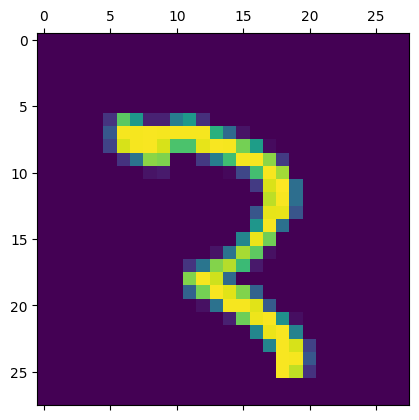

In [58]:
plt.matshow(x_train[500])

In [59]:
y_train[200]

1

In [60]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [1]:
x_train.shape

NameError: name 'x_train' is not defined

In [62]:
x_train = x_train/255
x_test = x_test/255

In [63]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [64]:
x_train_flattened.shape

(60000, 784)

In [65]:
x_test_flattened.shape

(10000, 784)

In [66]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [68]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4661 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2664 - accuracy: 0.9260


In [69]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9269


[0.2667999565601349, 0.9269000291824341]

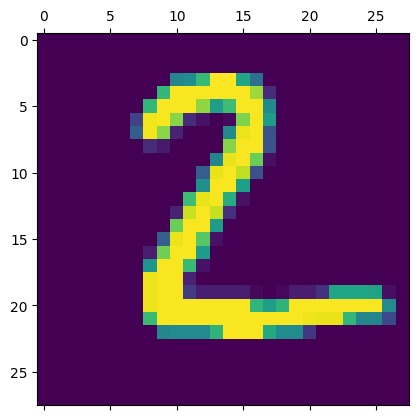

In [70]:
plt.matshow(x_test[1])

In [71]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.2173429e-02, 3.0381938e-07, 5.2488670e-02, 9.3784654e-01,
       1.9200908e-03, 1.0243910e-01, 1.2528984e-06, 9.9980873e-01,
       7.6977186e-02, 6.5883911e-01], dtype=float32)

In [72]:
np.argmax(y_predicted[0])

7

In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    0,    5,    3,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   9,   12,  923,   12,    8,    4,   12,   11,   36,    5],
       [   4,    0,   21,  910,    0,   34,    2,   12,   18,    9],
       [   1,    2,    4,    1,  918,    0,   10,    4,    9,   33],
       [  11,    3,    3,   21,    8,  790,   13,    8,   28,    7],
       [  14,    3,    6,    1,    7,   14,  909,    2,    2,    0],
       [   1,    5,   21,    4,    7,    0,    0,  959,    3,   28],
       [  11,   11,    5,   18,    9,   25,    9,   15,  864,    7],
       [  11,    7,    1,    7,   26,    8,    0,   32,    4,  913]])>

Text(95.72222222222221, 0.5, 'Truth')

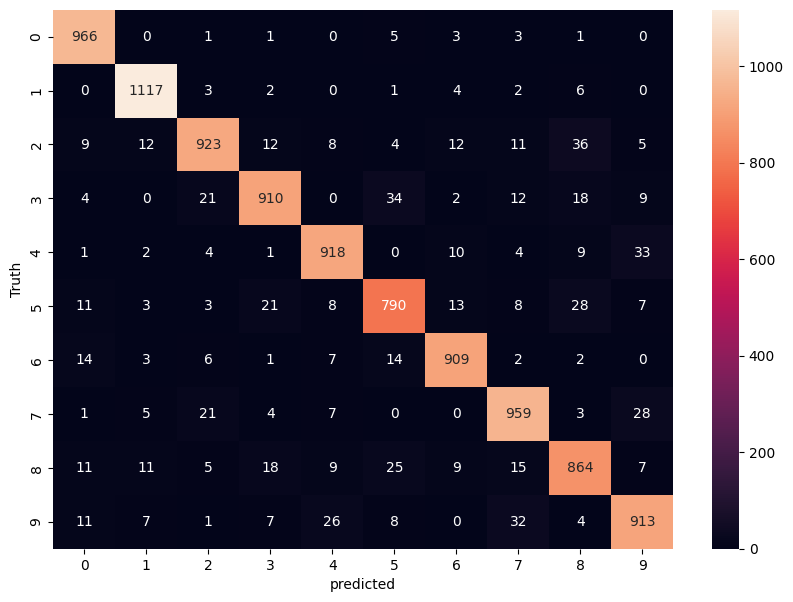

In [75]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [76]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2794 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1340 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0938 - accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0706 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9827


In [77]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9756


[0.07649290561676025, 0.975600004196167]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

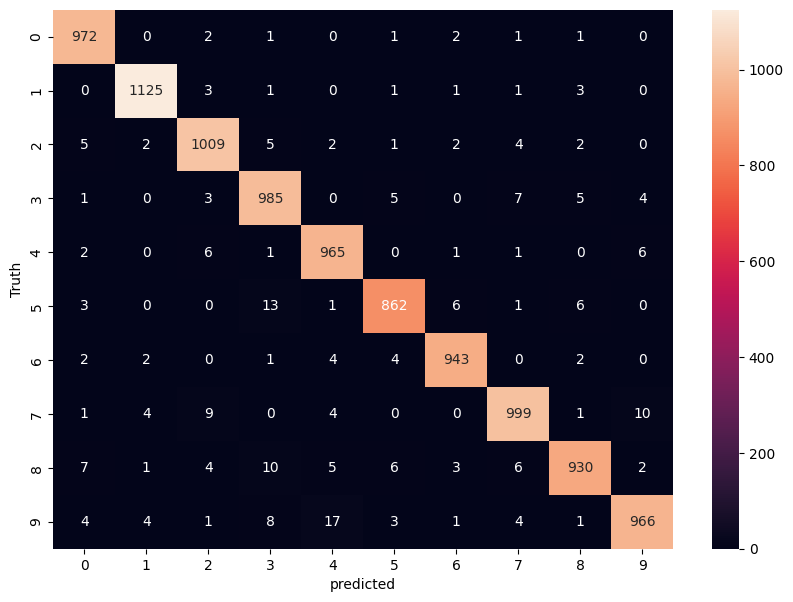

In [78]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [81]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2679 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1210 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0855 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0663 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0509 - accuracy: 0.9847
